소개:- 은행은 시장 경제에서 중요한 역할을 합니다. 그들은 누가 금융을 받을 수 있는지, 어떤 조건으로 결정하며 투자 결정을 내리거나 깨뜨릴 수 있는지를 결정합니다. 시장과 사회가 기능하려면 개인과 기업이 신용에 액세스해야 합니다.

채무 불이행 확률을 추측하는 신용 점수 알고리즘은 은행이 대출을 부여해야하는지 여부를 결정하는 데 사용하는 방법입니다. 목표는 누군가가 향후 2 년 동안 재정적 고통을 경험할 확률을 예측하여 신용 점수의 예술 상태를 개선하는 것입니다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

In [2]:
df=pd.read_csv('cs-training.csv')

In [3]:
df.head(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

변수 목록은 모든 변수가 숫자이며 이러한 변수 중 몇 개가 누락된 값을 나타냅니다. 이러한 변수의 요약을 살펴보겠습니다.


In [5]:
df.rename(columns={df.columns[0]:'ID'},inplace=True)

df.describe()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


depdendent 변수는 'SeriousDlqin2yrs'입니다. 'NumberOfTime30_59DaysPastDueNotW', 'NumberOfTime60_89DaysPastDueNotW', 'NumberOfTimes90DaysLate'와 같은 변수도 있습니다. 이러한 변수는 결제 및 빈도로 인해 고객이 지연된 금액에 대한 정보를 제공합니다. 금융 산업에서 이러한 유형의 변수는 종속 변수를 만들기 위한 입력입니다. 따라서 이러한 변수는 독립적인 변수로 사용할 수 없습니다.

또한 이 모델을 사용하면 새 고객에게 점수를 매기는 것이며 새로운 고객이 이러한 변수를 사용할 수 없습니다. 따라서 이러한 변수를 바로 제거해 보겠습니다.


In [6]:
df.drop(df.columns[[4,8,10]],axis=1,inplace=True)
df.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,1,1,0.766127,45,0.802982,9120.0,13,6,2.0
1,2,0,0.957151,40,0.121876,2600.0,4,0,1.0
2,3,0,0.658180,38,0.085113,3042.0,2,0,0.0
3,4,0,0.233810,30,0.036050,3300.0,5,0,0.0
4,5,0,0.907239,49,0.024926,63588.0,7,1,0.0


In [7]:
P=df.groupby('SeriousDlqin2yrs')['ID'].count().reset_index()

P['Percentage']=100*P['ID'] / P['ID'].sum()

print(P)

   SeriousDlqin2yrs      ID  Percentage
0                 0  139974      93.316
1                 1   10026       6.684


Freq 표는 누락된 값이 없으며 예상대로 0과 1이 포함되어 있음을 보여 주습니다. 연체자는 6.68%입니다.


<AxesSubplot:>

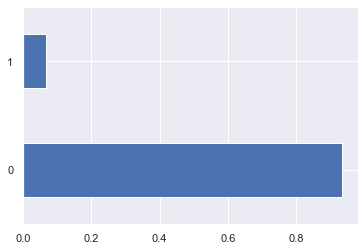

In [8]:
df['SeriousDlqin2yrs'].value_counts(normalize=True).plot(kind='barh')
#normalize=True이면 0~255 범위인 각 픽셀의 값을 0.0~1.0 범위를 갖도록 255로 나눈다.

#### RevolvingUtilizationOfUnsecuredLines

In [9]:
df['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

누락된 값이 없습니다. 0의 낮은 값은 괜찮지만 최대 값은 1 보다 더 희귀이기 때문에 말도 안됩니다.

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


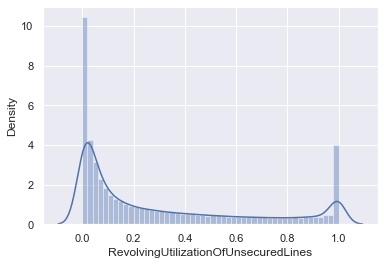

In [10]:
df3=df.loc[df['RevolvingUtilizationOfUnsecuredLines']<=1]
sns.distplot(df3['RevolvingUtilizationOfUnsecuredLines']);

In [11]:
len(df[(df['RevolvingUtilizationOfUnsecuredLines']>1)])

3321

이는 약 3,300개의 관측값이 1개 이상의 값을 가지고 있으므로 이 모든 값을 이상값과 캡으로 간주하는 것이 적절하지 않다는 것을 보여줍니다. 더 나은 방법은 이러한 누락을 만들고 값을 결부하는 것입니다.

In [12]:
df['RevolvingUtilizationOfUnsecuredLines']=df['RevolvingUtilizationOfUnsecuredLines'].map(lambda x:np.NaN if x>1 else x)

In [13]:
df['RevolvingUtilizationOfUnsecuredLines'].describe()

count    146679.000000
mean          0.303782
std           0.337892
min           0.000000
25%           0.028608
50%           0.144476
75%           0.519980
max           1.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

대치의 경우 변수의 분포와 평균을 유지하는 ffill 방법을 사용합니다.

In [14]:
df['RevolvingUtilizationOfUnsecuredLines'].fillna(method='ffill',inplace=True)

In [15]:
df['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          0.303669
std           0.337852
min           0.000000
25%           0.028578
50%           0.144257
75%           0.520104
max           1.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

#### Age

In [16]:
df['age'].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

누락된 값이 없습니다. 0과 최대 값109의 낮은 값은 이상값입니다. 일반적인 연령대는 18-80입니다.

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

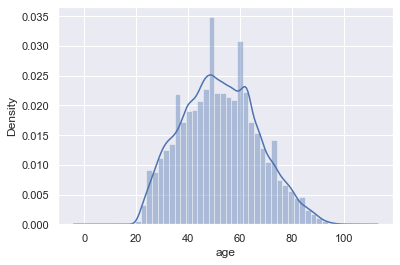

In [17]:
sns.distplot(df['age'])

In [18]:
df.loc[df['age']>80,'age']=80
df.loc[df['age']<18,'age']=18

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

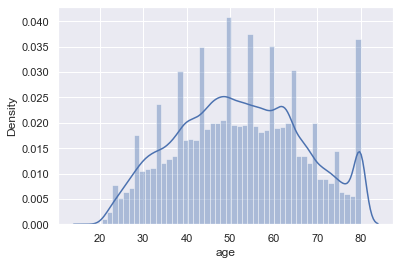

In [19]:
sns.distplot(df['age'])

In [20]:
df['age'].describe()

count    150000.000000
mean         52.120087
std          14.389418
min          18.000000
25%          41.000000
50%          52.000000
75%          63.000000
max          80.000000
Name: age, dtype: float64

#### DebtRatio

In [21]:
df['DebtRatio'].describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

이 변수는 부채대 소득 비율을 의미합니다.누락된 값은 없습니다. 0의 낮은 값은 괜찮지만 최대 값은 더 많은 희귀이기 때문에 말도 안됩니다.

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DebtRatio', ylabel='Density'>

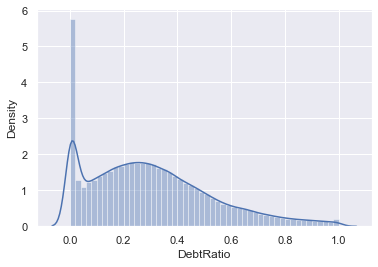

In [22]:
df2=df[df['DebtRatio']<=1]
sns.distplot(df2['DebtRatio'])

In [23]:
df2=df[df['DebtRatio']>1]
df2['DebtRatio'].describe()

count     35137.000000
mean       1505.989566
std        3999.026847
min           1.000500
25%          42.000000
50%         907.000000
75%        2210.000000
max      329664.000000
Name: DebtRatio, dtype: float64

부채 소득비율의 일반적인 가치는 0.4입니다. 그러나 거의 35000개의 관측값은 1보다 높았기 때문에 이상값으로 취급될 수 없습니다. 가장 좋은 방법은 누락및 단호한 값으로 고려하는 것입니다

In [24]:
df.loc[df['DebtRatio']>1,'DebtRatio']=np.NaN

In [25]:
df['DebtRatio'].describe()

count    114863.000000
mean          0.303022
std           0.226287
min           0.000000
25%           0.125981
50%           0.274505
75%           0.438098
max           1.000000
Name: DebtRatio, dtype: float64

In [26]:
df['DebtRatio'].fillna(method='ffill',inplace=True)

In [27]:
df['DebtRatio'].describe()

count    150000.000000
mean          0.303109
std           0.226290
min           0.000000
25%           0.126122
50%           0.274252
75%           0.438325
max           1.000000
Name: DebtRatio, dtype: float64

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DebtRatio', ylabel='Density'>

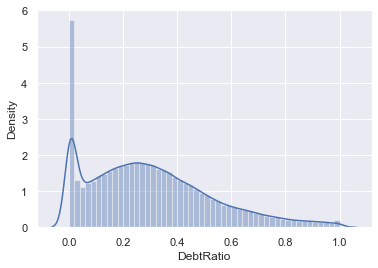

In [28]:
sns.distplot(df['DebtRatio'])

#### NumberOfOpenCreditLinesAndLoans

In [29]:
df['NumberOfOpenCreditLinesAndLoans'].describe()

count    150000.000000
mean          8.452760
std           5.145951
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

누락된 값이 없습니다. 0의 낮은 값은 괜찮습니다. 최대 값 58은 평균보다 훨씬 높기 때문에 이상치인 것 같습니다(최대값은 평균에서 10*std떨어져 있음)

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumberOfOpenCreditLinesAndLoans', ylabel='Density'>

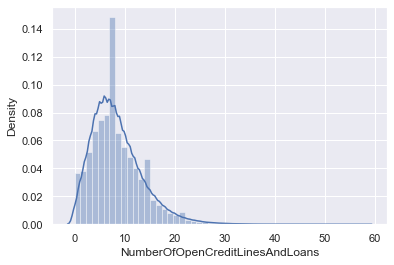

In [30]:
sns.distplot(df['NumberOfOpenCreditLinesAndLoans'])

분포는 최대 30까지 연속임을 나타냅니다. 따라서, 30에서 모자를 보자

In [31]:
df.loc[df['NumberOfOpenCreditLinesAndLoans']>30,'NumberOfOpenCreditLinesAndLoans']=30

In [32]:
df['NumberOfOpenCreditLinesAndLoans'].describe()

count    150000.000000
mean          8.438793
std           5.070728
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          30.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumberOfOpenCreditLinesAndLoans', ylabel='Density'>

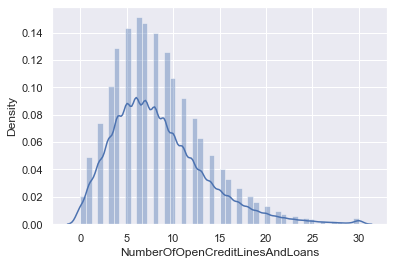

In [33]:
sns.distplot(df['NumberOfOpenCreditLinesAndLoans'])

#### MonthlyIncome

In [34]:
df['MonthlyIncome'].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

누락된 값이 있고 Max 값이 너무 큽습니다. 금융업계가 최소 소득이 1000을 기대하기 때문에 0의 최소 가치는 괜찮지 않습니다.

In [35]:
df['MonthlyIncome'].isnull().sum()

29731

In [36]:
len(df[df['MonthlyIncome']<1000])

4428

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

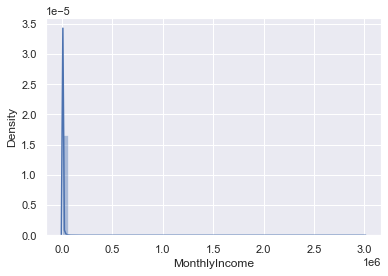

In [37]:
sns.distplot(df['MonthlyIncome'].dropna())

최대 값이 너무 커서 플롯이 의미가 없습니다.

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

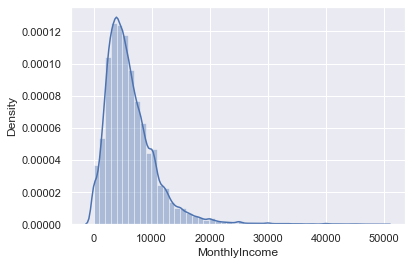

In [38]:
df2=df[df['MonthlyIncome']<50000]
sns.distplot(df2['MonthlyIncome'].dropna())

분포는 소득이 25000까지 원활하게 감소하고 거대한 가치의 몇 이상값을 보여줍니다.

In [39]:
df.loc[df['MonthlyIncome']>25000,'MonthlyIncome']=25000
df['MonthlyIncome'].describe()

count    120269.000000
mean       6349.112332
std        4358.376183
min           0.000000
25%        3400.000000
50%        5400.000000
75%        8249.000000
max       25000.000000
Name: MonthlyIncome, dtype: float64

In [40]:
df.loc[df['MonthlyIncome']<1000,'MonthlyIncome']=np.NaN
df['MonthlyIncome'].describe()

count    115841.000000
mean       6579.317737
std        4275.154379
min        1000.000000
25%        3600.000000
50%        5513.000000
75%        8334.000000
max       25000.000000
Name: MonthlyIncome, dtype: float64

In [41]:
df['MonthlyIncome'].fillna(method='ffill',inplace=True)
df['MonthlyIncome'].describe()

count    150000.000000
mean       6578.107227
std        4286.321398
min        1000.000000
25%        3600.000000
50%        5500.000000
75%        8333.000000
max       25000.000000
Name: MonthlyIncome, dtype: float64

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

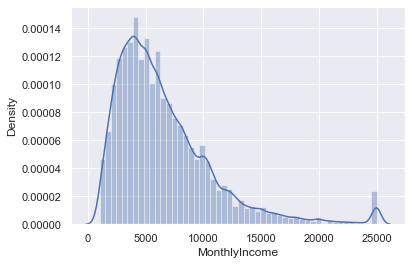

In [42]:
sns.distplot(df['MonthlyIncome'])

#### NumberRealEstateLoansOrLines

In [43]:
df['NumberRealEstateLoansOrLines'].describe()

count    150000.000000
mean          1.018240
std           1.129771
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

누락된 값은 없지만 최대 값이 너무 큽니다. 0의 최소 값은 괜찮습니다.

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumberRealEstateLoansOrLines', ylabel='Density'>

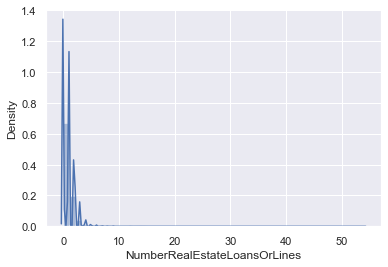

In [44]:
sns.distplot(df['NumberRealEstateLoansOrLines'])

분포는 변수가 최대 10까지 원활하 한 다음 큰 값의 이상값을 거의 감소시키는 것을 보여줍니다.

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumberRealEstateLoansOrLines', ylabel='Density'>

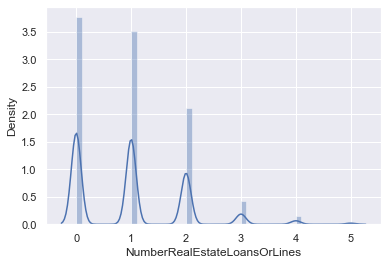

In [45]:
df2=df[df['NumberRealEstateLoansOrLines']<6]
sns.distplot(df2['NumberRealEstateLoansOrLines'].dropna())

In [46]:
df.loc[df['NumberRealEstateLoansOrLines']>5,'NumberRealEstateLoansOrLines']=5
df['NumberRealEstateLoansOrLines'].describe()

count    150000.000000
mean          1.002480
std           1.020301
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           5.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumberRealEstateLoansOrLines', ylabel='Density'>

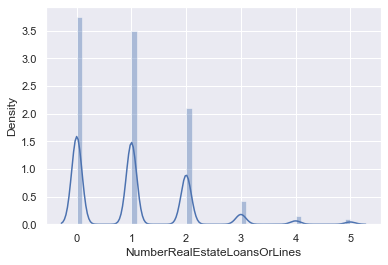

In [47]:
sns.distplot(df['NumberRealEstateLoansOrLines'])

#### NumOfDependents

In [49]:
df['NumberOfDependents'].describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumberOfDependents', ylabel='Density'>

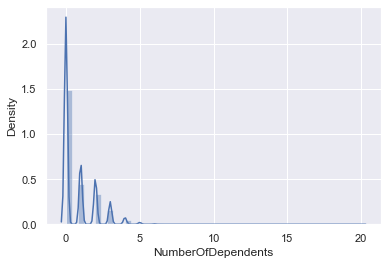

In [50]:
sns.distplot(df['NumberOfDependents'].dropna())

누락된 값이 있습니다. 분포는 연속 5이고 몇 가지 이상값입니다.


In [51]:
df.loc[df['NumberOfDependents']>5, 'NumberOfDependents']=5
df['NumberOfDependents'].describe()

count    146076.000000
mean          0.754484
std           1.101288
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: NumberOfDependents, dtype: float64

누락된 비율이 크므로 평균을 사용하는 대조는 분포를 너무 많이 변경하므로 적절하지 않습니다. 평균 및 표준 편차를 보존하기 때문에 ffill을 사용하여 누락 된 값을 단결하게 합니다.

In [52]:
#df['NumberOfDependents'].fillna(df['NumberOfDependents'].mean(), inplace=True)
df['NumberOfDependents'].fillna(method='ffill',inplace=True)
df['NumberOfDependents'].describe()

count    150000.000000
mean          0.754487
std           1.101377
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: NumberOfDependents, dtype: float64

In [53]:
df.describe()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,0.303669,52.120087,0.303109,6578.107227,8.438793,1.002480,0.754487
std,43301.414527,0.249746,0.337852,14.389418,0.226290,4286.321398,5.070728,1.020301,1.101377
min,1.000000,0.000000,0.000000,18.000000,0.000000,1000.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.028578,41.000000,0.126122,3600.000000,5.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.144257,52.000000,0.274252,5500.000000,8.000000,1.000000,0.000000
75%,112500.250000,0.000000,0.520104,63.000000,0.438325,8333.000000,11.000000,2.000000,1.000000
max,150000.000000,1.000000,1.000000,80.000000,1.000000,25000.000000,30.000000,5.000000,5.000000


데이터가 이제 깨끗한 것처럼 보입니다. .pkl 파일로 저장할 수 있습니다.

In [54]:
df.to_pickle('gmsc_clean,pkl')

### Exploratory Data Analysis

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
sns.set(color_codes=True)

%matplotlib inline

In [59]:
df

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
0,1,1,0.766127,45,0.802982,9120.0,13,5,2.0
1,2,0,0.957151,40,0.121876,2600.0,4,0,1.0
2,3,0,0.658180,38,0.085113,3042.0,2,0,0.0
3,4,0,0.233810,30,0.036050,3300.0,5,0,0.0
4,5,0,0.907239,49,0.024926,25000.0,7,1,0.0
...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0.225131,2100.0,4,1,0.0
149996,149997,0,0.299745,44,0.716562,5584.0,4,1,2.0
149997,149998,0,0.246044,58,0.716562,5584.0,18,1,0.0
149998,149999,0,0.000000,30,0.000000,5716.0,4,0,0.0


In [60]:
df.describe()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,0.303669,52.120087,0.303109,6578.107227,8.438793,1.002480,0.754487
std,43301.414527,0.249746,0.337852,14.389418,0.226290,4286.321398,5.070728,1.020301,1.101377
min,1.000000,0.000000,0.000000,18.000000,0.000000,1000.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.028578,41.000000,0.126122,3600.000000,5.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.144257,52.000000,0.274252,5500.000000,8.000000,1.000000,0.000000
75%,112500.250000,0.000000,0.520104,63.000000,0.438325,8333.000000,11.000000,2.000000,1.000000
max,150000.000000,1.000000,1.000000,80.000000,1.000000,25000.000000,30.000000,5.000000,5.000000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 9 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberRealEstateLoansOrLines          150000 non-null  int64  
 8   NumberOfDependents                    150000 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 10.3 MB


#### 단변 분석

단일 변종 분석의 목적은 각 변수를 하나씩 검사하는 것입니다. 변수의 분포에 초점이 맞춰집니다. 종속 변수로 시작해 보겠습니다.

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

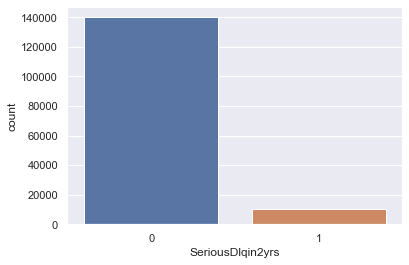

In [62]:
sns.countplot(x='SeriousDlqin2yrs',data=df)

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


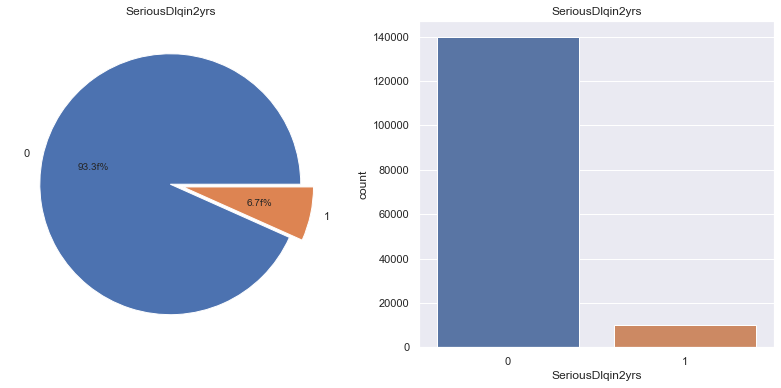

In [63]:
f,ax=plt.subplots(1,2,figsize=(14,6))
df['SeriousDlqin2yrs'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1ff%%',ax=ax[0],shadow=False)
ax[0].set_title('SeriousDlqin2yrs')
ax[0].set_ylabel('')
sns.countplot('SeriousDlqin2yrs',data=df,ax=ax[1])
ax[1].set_title('SeriousDlqin2yrs')
plt.show()

약 6.7%의 고객이 연체자였습니다.

모든 독립 변수에 대한 배포 차트를 함께 만들어 보겠습니다.

RevolvingUtilizationOfUnsecuredLines


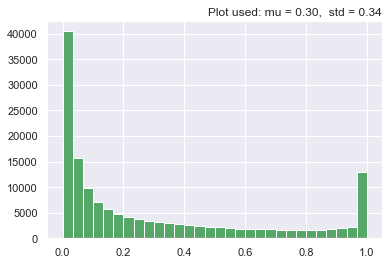

age


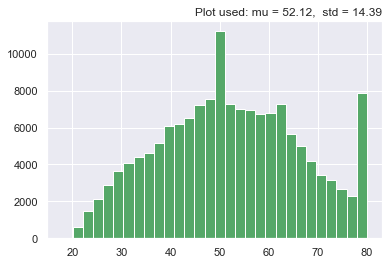

DebtRatio


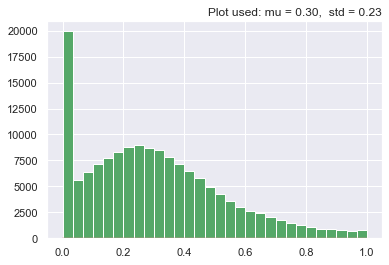

MonthlyIncome


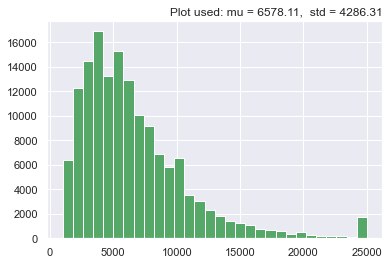

NumberOfOpenCreditLinesAndLoans


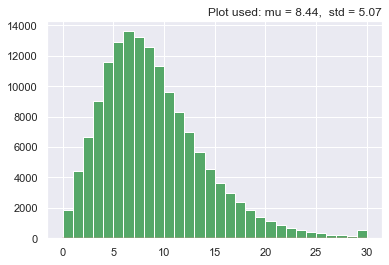

NumberRealEstateLoansOrLines


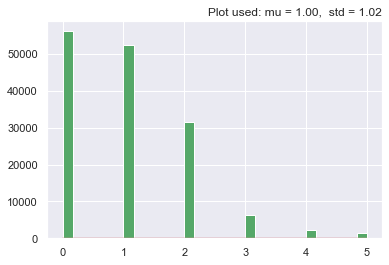

NumberOfDependents


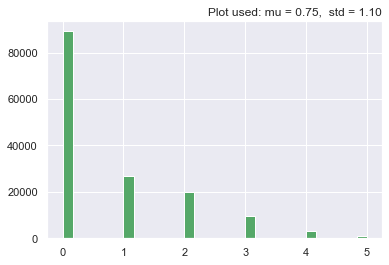

In [68]:
for column in df.columns[2:]:
    print(column)
    #s=df['column']
    s=df[column]
    mu, sigma =norm.fit(s)
    count, bins, ignored = plt.hist(s, 30, color='g')
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1, color='r')

    title = "Plot used: mu = %.2f,  std = %.2f" % (mu, sigma)
    plt.title(title, loc='right')

    plt.show()

이러한 모든 변수는 잘 보입니다. 이러한 변수 중 일부를 배포하는 것은 일반 분포에 가깝지 않지만 매우 중요하지는 않습니다. 우리가 적용하는 기술은 정상에 매우 민감하지 않습니다. 또한 이러한 변수 중 일부를 모델링 범주로 변환할 수도 있습니다(예: 회전 활용OfUnsecured라인).

#### Bivariate Analysis

바이바리에이트 분석에서 종속 변수와 각 독립 변수 간의 현실을 살펴보겠습니다. 또한 선택한 독립 변수 쌍을 확인합니다.

SeriousDlqin2yrs vs RevolvingUtilizationOfUnsecuredLines

가장 쉬운 방법은 Revolving활용의 수단을 비교하는 것입니다

In [69]:
df.groupby('SeriousDlqin2yrs')['RevolvingUtilizationOfUnsecuredLines'].agg(['count','mean'])
#agg () 메서드는 사용자에게 다중집계작업 (multiple aggregation operation)을 간결하게 나타낼수 있도록 한다. 이 메서드는 apply () 메서드와 유사한 면이 존재하나, 이 메서드는 한번의 메서드에 여러 함수를 동시에 입력하고 결과를 출력할 수 있다는 차이점이 존재한다.


,count,mean
SeriousDlqin2yrs,,
0,139974,0.282806
1,10026,0.594927


<AxesSubplot:xlabel='SeriousDlqin2yrs'>

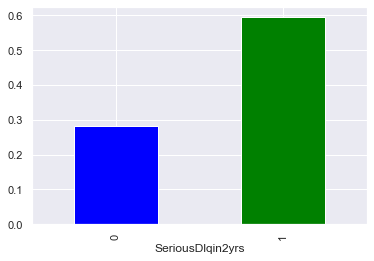

In [70]:
df['RevolvingUtilizationOfUnsecuredLines'].groupby(df.SeriousDlqin2yrs).mean().plot(kind='bar',color=['blue','green'])

예상대로, 연체 고객은 거의 두 배의 무담보 라인을 활용했습니다.

이제 바릴수있는 분류하여 관계를 자세히 살펴보겠습니다. 변수를 분류하기 위해 25, 50 및 75 백분위수를 컷오프로 선택합니다.

In [71]:
df['RevolvingUtilizationOfUnsecuredLines'].describe()

count    150000.000000
mean          0.303669
std           0.337852
min           0.000000
25%           0.028578
50%           0.144257
75%           0.520104
max           1.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [72]:
def cat_ruul(ruul):
    if ruul <0.03:
        return 1
    elif 0.03<= ruul<0.14:
        return 2
    elif 0.14 <= ruul<0.52:
        return 3
    else:
        return 4

In [74]:
df['ruul_cat']=df['RevolvingUtilizationOfUnsecuredLines'].apply(cat_ruul)
df.head(3)
#apply : pandas객체에 열 혹은 행에 대해 함수를 적용하게 해줌

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,ruul_cat
0,1,1,0.766127,45,0.802982,9120.0,13,5,2.0,4
1,2,0,0.957151,40,0.121876,2600.0,4,0,1.0,4
2,3,0,0.658180,38,0.085113,3042.0,2,0,0.0,4


In [75]:
df.groupby('ruul_cat')['RevolvingUtilizationOfUnsecuredLines'].agg(['min','max'])

,min,max
ruul_cat,,
1,0.000000,0.030000
2,0.030006,0.139999
3,0.140022,0.519983
4,0.520023,1.000000


In [76]:
pd.crosstab(df.SeriousDlqin2yrs,df.ruul_cat,normalize='columns')

ruul_cat,1,2,3,4
SeriousDlqin2yrs,,,,
0,0.973692,0.972357,0.946664,0.84043
1,0.026308,0.027643,0.053336,0.15957


<AxesSubplot:xlabel='ruul_cat'>

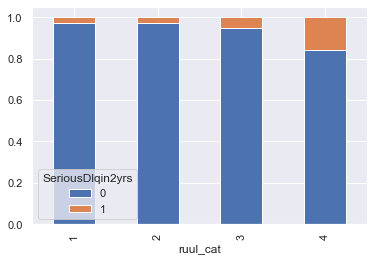

In [77]:
sb=pd.crosstab(df.ruul_cat,df.SeriousDlqin2yrs,normalize=0)
sb.plot.bar(stacked=True)

예상대로 플롯은 가장 높은 사용률 범주에 체납이 더 많다는 것을 보여줍니다. 그러나 처음 두 범주 사이에는 큰 차이가 없습니다.

In [78]:
df2=pd.crosstab(df.SeriousDlqin2yrs,df.ruul_cat)
chi2_contingency(df2)

(7177.181787116916,
 0.0,
 3,
 array([[35895.86572, 33386.59848, 35691.50368, 35000.03212],
        [ 2571.13428,  2391.40152,  2556.49632,  2506.96788]]))

카이제곱 테스트는 활용과 연체 사이에 상당한 의존도가 있음을 확립합니다.

카이제곱 결정(chi-square)

질적 자료와 질적 자료간 서로 통계적으로 관계가 있는지 판단하는 검정

카이제곱 분포를 기반으로 관찰된 빈도와 기대되는 빈도와 의미있게 다른지 여부 검증

SeriousDlqin2yrs vs Age

가장 쉬운 방법은 SeriousDlqin2yrs의 두 가지 범주로 시대의 수단을 비교하는 것입니다.

In [79]:
df.groupby('SeriousDlqin2yrs')['age'].agg(['count','mean'])

,count,mean
SeriousDlqin2yrs,,
0,139974,52.567834
1,10026,45.869040


<AxesSubplot:xlabel='SeriousDlqin2yrs'>

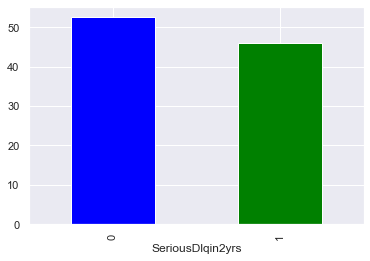

In [80]:
df['age'].groupby(df.SeriousDlqin2yrs).mean().plot(kind='bar',color=['blue','green'])

연체 종료된 고객보다 연체 된 고객보다 젊습니다.

이제 나이를 분류하여 관계를 자세히 살펴보겠습니다. 변수를 분류하기 위해 25, 50 및 75 백분위수를 컷오프로 선택합니다.

In [81]:
df['age'].describe()

count    150000.000000
mean         52.120087
std          14.389418
min          18.000000
25%          41.000000
50%          52.000000
75%          63.000000
max          80.000000
Name: age, dtype: float64

In [82]:
def cat_ruul(ruul):
    if ruul<41:
        return 1
    elif 41<=ruul<52:
        return 2
    elif 52<=ruul<63:
        return 3
    else:
        return 4

In [83]:
df['age_cat']=df['age'].apply(cat_ruul)
df.head(3)

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,ruul_cat,age_cat
0,1,1,0.766127,45,0.802982,9120.0,13,5,2.0,4,2
1,2,0,0.957151,40,0.121876,2600.0,4,0,1.0,4,1
2,3,0,0.658180,38,0.085113,3042.0,2,0,0.0,4,1


In [84]:
# 분류가 올바르게 수행되었는지 확인할 수 있습니다.
df.groupby('age_cat')['age'].agg(['min','max'])

,min,max
age_cat,,
1,18,40
2,41,51
3,52,62
4,63,80


In [85]:
pd.crosstab(df.SeriousDlqin2yrs,df.age_cat,normalize='columns')

age_cat,1,2,3,4
SeriousDlqin2yrs,,,,
0,0.896458,0.918115,0.942146,0.973347
1,0.103542,0.081885,0.057854,0.026653


<AxesSubplot:xlabel='age_cat'>

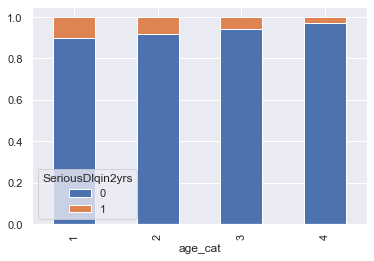

In [86]:
sb=pd.crosstab(df.age_cat,df.SeriousDlqin2yrs,normalize=0)
sb.plot.bar(stacked=True)

플롯은 가장 어린 나이의 범주에 체납자의 비율이 더 높다는 것을 보여줍니다. 나이가 균일하게 증가함에 따라 연체율이 감소합니다.

In [87]:
df2=pd.crosstab(df.SeriousDlqin2yrs,df.age_cat)
chi2_contingency(df2)

(1930.9900919630384,
 0.0,
 3,
 array([[32751.11652, 36079.69824, 35711.10004, 35432.0852 ],
        [ 2345.88348,  2584.30176,  2557.89996,  2537.9148 ]]))

카이제곱 테스트는 나이와 연체 사이에 상당한 의존성이 있음을 확인

SeriousDlqin2yrs vs DebtRatio

가장 쉬운 방법은 DebtRatio의 수단을 SeriousDlqin2yrs의 두 범주로 비교하는 것입니다.

In [89]:
df.groupby('SeriousDlqin2yrs')['DebtRatio'].agg(['count','mean'])

,count,mean
SeriousDlqin2yrs,,
0,139974,0.300645
1,10026,0.337519


<AxesSubplot:xlabel='SeriousDlqin2yrs'>

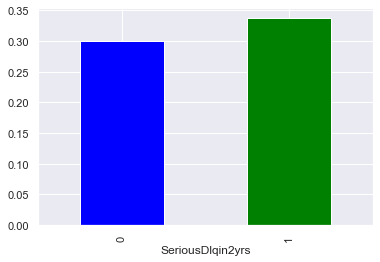

In [90]:
df['DebtRatio'].groupby(df.SeriousDlqin2yrs).mean().plot(kind='bar',color=['blue','green'])

연체 고객은 연체되지 않는 고객에 비해 부채 비율이 더 높았습니다.

이제 DebtRatio를 분류하여 관계를 자세히 살펴보겠습니다. 변수를 분류하기 위해 25, 50 및 75 백분위수를 컷오프로 선택합니다.

In [92]:
df['DebtRatio'].describe()

count    150000.000000
mean          0.303109
std           0.226290
min           0.000000
25%           0.126122
50%           0.274252
75%           0.438325
max           1.000000
Name: DebtRatio, dtype: float64

In [93]:
def cat_ruul(ruul):
    if ruul<0.13:
        return 1
    elif 0.13<=ruul<0.27:
        return 2
    elif 0.27<=ruul<0.43:
        return 3
    else:
        return 4

In [94]:
df['DebtRatio_cat']=df['DebtRatio'].apply(cat_ruul)
df.head(3)

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,ruul_cat,age_cat,DebtRatio_cat
0,1,1,0.766127,45,0.802982,9120.0,13,5,2.0,4,2,4
1,2,0,0.957151,40,0.121876,2600.0,4,0,1.0,4,1,1
2,3,0,0.658180,38,0.085113,3042.0,2,0,0.0,4,1,1


In [95]:
# 분류가 올바르게 수행되었는지 확인할 수 있습니다.
df.groupby('DebtRatio_cat')['DebtRatio'].agg(['min','max'])

,min,max
DebtRatio_cat,,
1,0.000000,0.129995
2,0.130008,0.269990
3,0.270009,0.429991
4,0.430011,1.000000


In [96]:
pd.crosstab(df.SeriousDlqin2yrs,df.DebtRatio_cat,normalize='columns')

DebtRatio_cat,1,2,3,4
SeriousDlqin2yrs,,,,
0,0.939219,0.939605,0.938991,0.915813
1,0.060781,0.060395,0.061009,0.084187


<AxesSubplot:xlabel='DebtRatio_cat'>

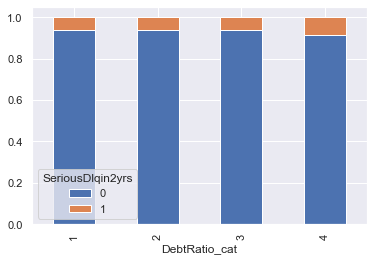

In [97]:
sb=pd.crosstab(df.DebtRatio_cat,df.SeriousDlqin2yrs,normalize=0)
sb.plot.bar(stacked=True)

예상대로 가장 높은 채무비율 범주에 체납이 더 많다는 것을 보여줍니다.

In [99]:
df2=pd.crosstab(df.SeriousDlqin2yrs,df.DebtRatio_cat)
chi2_contingency(df2)

(254.86642993657873,
 5.7976020035809566e-55,
 3,
 array([[35726.0306 , 33219.56284, 34582.9096 , 36445.49696],
        [ 2558.9694 ,  2379.43716,  2477.0904 ,  2610.50304]]))

카이제곱 테스트는 DebtRatio와 연체 사이에 상당한 의존성이 있음을 입증합니다.

SeriousDlqin2yrs vs MonthlyIncome

가장 간단한 방법은 월간 소득을 SeriousDlqin2yrs의 두 범주로 비교하는 것입니다.

In [101]:
df.groupby('SeriousDlqin2yrs')['MonthlyIncome'].agg(['count','mean'])

,count,mean
SeriousDlqin2yrs,,
0,139974,6635.519196
1,10026,5776.572910


<AxesSubplot:xlabel='SeriousDlqin2yrs'>

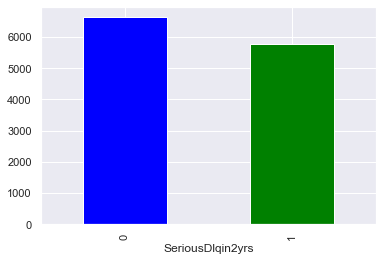

In [102]:
df['MonthlyIncome'].groupby(df.SeriousDlqin2yrs).mean().plot(kind='bar',color=['blue','green'])

연체 된 고객에 비해 월별 수입이 낮아졌습니다.

이제 월별 소득을 분류하여 관계를 자세히 살펴보겠습니다. 변수를 분류하기 위해 25, 50 및 75 백분위수를 컷오프로 선택합니다.

In [103]:
df['MonthlyIncome'].describe()

count    150000.000000
mean       6578.107227
std        4286.321398
min        1000.000000
25%        3600.000000
50%        5500.000000
75%        8333.000000
max       25000.000000
Name: MonthlyIncome, dtype: float64

In [104]:
def cat_ruul(ruul):
    if ruul<3600:
        return 1
    elif 3600<=ruul<5500:
        return 2
    elif 5500<=ruul<8333:
        return 3
    else:
        return 4

In [105]:
df['MonthlyIncome_cat']=df['MonthlyIncome'].apply(cat_ruul)
df.head(3)

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,ruul_cat,age_cat,DebtRatio_cat,MonthlyIncome_cat
0,1,1,0.766127,45,0.802982,9120.0,13,5,2.0,4,2,4,4
1,2,0,0.957151,40,0.121876,2600.0,4,0,1.0,4,1,1,1
2,3,0,0.658180,38,0.085113,3042.0,2,0,0.0,4,1,1,1


In [106]:
# 분류가 올바르게 수행되었는지 확인할 수 있습니다.
df.groupby('MonthlyIncome_cat')['MonthlyIncome'].agg(['min','max'])

,min,max
MonthlyIncome_cat,,
1,1000.0,3599.0
2,3600.0,5499.0
3,5500.0,8332.0
4,8333.0,25000.0


In [107]:
pd.crosstab(df.SeriousDlqin2yrs,df.MonthlyIncome_cat,normalize='columns')

MonthlyIncome_cat,1,2,3,4
SeriousDlqin2yrs,,,,
0,0.912834,0.926565,0.940627,0.951984
1,0.087166,0.073435,0.059373,0.048016


<AxesSubplot:xlabel='MonthlyIncome_cat'>

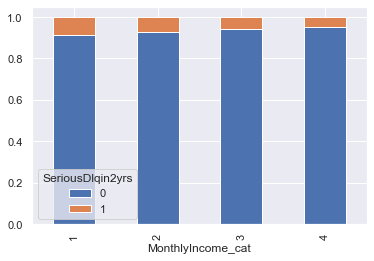

In [108]:
sb=pd.crosstab(df.MonthlyIncome_cat,df.SeriousDlqin2yrs,normalize=0)
sb.plot.bar(stacked=True)

예상대로 가장 높은 월간소득 범주에 체납이 적다는 것을 보여줍니다.

In [109]:
df2=pd.crosstab(df.SeriousDlqin2yrs,df.MonthlyIncome_cat)
chi2_contingency(df2)

(524.3515592410665,
 2.518157324733066e-113,
 3,
 array([[34974.8368 , 33953.95976, 35441.4168 , 35603.78664],
        [ 2505.1632 ,  2432.04024,  2538.5832 ,  2550.21336]]))

카이제곱 테스트는 월별 소득과 연체 사이에 상당한 의존도가 있음을 확립합니다.

SeriousDlqin2yrs vs NumberOfOpenCreditLinesAndLoans

가장 간단한 방법은 NumberOfOpenCreditLinesAndLoans의 수단을 SeriousDlqin2yrs의 두 범주로 비교하는 것입니다.

In [110]:
df.groupby('SeriousDlqin2yrs')['NumberOfOpenCreditLinesAndLoans'].agg(['count','mean'])

,count,mean
SeriousDlqin2yrs,,
0,139974,8.480196
1,10026,7.860762


<AxesSubplot:xlabel='SeriousDlqin2yrs'>

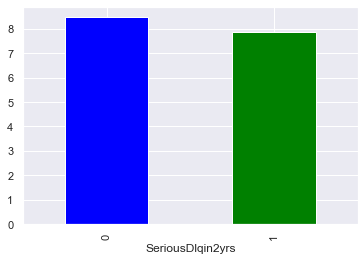

In [111]:
df['NumberOfOpenCreditLinesAndLoans'].groupby(df.SeriousDlqin2yrs).mean().plot(kind='bar',color=['blue','green'])

연체 된 고객에 비해 체납 된 고객은 더 낮은 NumberOfOpenCreditLinesAndLoans를 얻었다.

이제 NumberOfOpenCreditLinesAndLoans를 분류하여 관계를 자세히 살펴보겠습니다. 변수를 분류하기 위해 25, 50 및 75 백분위수를 컷오프로 선택합니다.

In [112]:
df['NumberOfOpenCreditLinesAndLoans'].describe()

count    150000.000000
mean          8.438793
std           5.070728
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          30.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

In [113]:
def cat_ruul(ruul):
    if ruul<5:
        return 1
    elif 5<=ruul<8:
        return 2
    elif 8<=ruul<11:
        return 3
    else:
        return 4

In [114]:
df['NOCLL_Cat']=df['NumberOfOpenCreditLinesAndLoans'].apply(cat_ruul)
df.head(3)

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,ruul_cat,age_cat,DebtRatio_cat,MonthlyIncome_cat,NOCLL_Cat
0,1,1,0.766127,45,0.802982,9120.0,13,5,2.0,4,2,4,4,4
1,2,0,0.957151,40,0.121876,2600.0,4,0,1.0,4,1,1,1,1
2,3,0,0.658180,38,0.085113,3042.0,2,0,0.0,4,1,1,1,1


In [115]:
# 분류가 올바르게 수행되었는지 확인할 수 있습니다.
df.groupby('NOCLL_Cat')['NumberOfOpenCreditLinesAndLoans'].agg(['min','max'])

,min,max
NOCLL_Cat,,
1,0,4
2,5,7
3,8,10
4,11,30


In [116]:
pd.crosstab(df.SeriousDlqin2yrs,df.NOCLL_Cat,normalize='columns')

NOCLL_Cat,1,2,3,4
SeriousDlqin2yrs,,,,
0,0.907811,0.941694,0.945023,0.935852
1,0.092189,0.058306,0.054977,0.064148


<AxesSubplot:xlabel='NOCLL_Cat'>

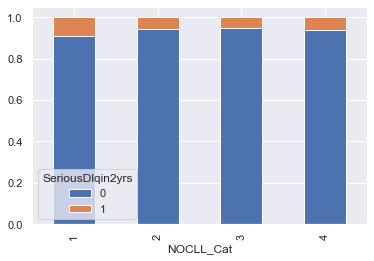

In [117]:
sb=pd.crosstab(df.NOCLL_Cat,df.SeriousDlqin2yrs,normalize=0)
sb.plot.bar(stacked=True)

예상대로 가장 낮은 NumberOfOpenCreditLinesAndLoans의 범주에 더 많은 연체가 있음을 보여줍니다.

In [118]:
df2=pd.crosstab(df.SeriousDlqin2yrs,df.NOCLL_Cat)
chi2_contingency(df2)

(473.89910137342736,
 2.1617934485230027e-102,
 3,
 array([[31409.23244, 37130.4364 , 31299.11956, 40135.2116 ],
        [ 2249.76756,  2659.5636 ,  2241.88044,  2874.7884 ]]))

카이제곱 테스트는 NumberOfOpenCreditLinesAndLoans와 연체 사이에 상당한 의존성이 있음을 확립합니다.

SeriousDlqin2yrs vs NumberRealEstateLoansOrLines

가장 간단한 방법은 NumberRealEstateLoansOrLines의 수단을 SeriousDlqin2yrs의 두 가지 범주로 비교하는 것입니다.

In [119]:
df.groupby('SeriousDlqin2yrs')['NumberRealEstateLoansOrLines'].agg(['count','mean'])

,count,mean
SeriousDlqin2yrs,,
0,139974,1.006808
1,10026,0.942051


<AxesSubplot:xlabel='SeriousDlqin2yrs'>

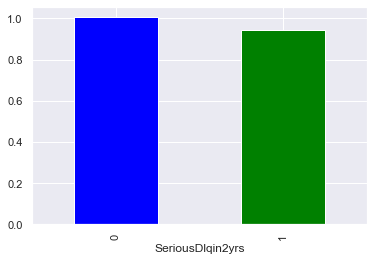

In [120]:
df['NumberRealEstateLoansOrLines'].groupby(df.SeriousDlqin2yrs).mean().plot(kind='bar',color=['blue','green'])

연체 된 고객에 비해 체납 된 cusomters는 더 낮은 NumberRealEstateLoansOrLines를 얻었다.

이제 NumberRealEstateLoansOrLines를 분류하여 관계를 자세히 살펴보겠습니다. 변수를 분류하기 위해 25, 50 및 75 백분위수를 컷오프로 선택합니다.

In [121]:
df['NumberRealEstateLoansOrLines'].describe()

count    150000.000000
mean          1.002480
std           1.020301
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           5.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

In [122]:
def cat_ruul(ruul):
    if ruul<=0:
        return 1
    elif 0<ruul<=1:
        return 2
    elif 1<ruul<=2:
        return 3
    else:
        return 4

In [123]:
df['NRELL_Cat']=df['NumberRealEstateLoansOrLines'].apply(cat_ruul)
df.head(3)

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,ruul_cat,age_cat,DebtRatio_cat,MonthlyIncome_cat,NOCLL_Cat,NRELL_Cat
0,1,1,0.766127,45,0.802982,9120.0,13,5,2.0,4,2,4,4,4,4
1,2,0,0.957151,40,0.121876,2600.0,4,0,1.0,4,1,1,1,1,1
2,3,0,0.658180,38,0.085113,3042.0,2,0,0.0,4,1,1,1,1,1


In [124]:
df.groupby('NRELL_Cat')['NumberRealEstateLoansOrLines'].agg(['min','max'])

,min,max
NRELL_Cat,,
1,0,0
2,1,1
3,2,2
4,3,5


In [125]:
pd.crosstab(df.SeriousDlqin2yrs,df.NRELL_Cat,normalize='columns')

NRELL_Cat,1,2,3,4
SeriousDlqin2yrs,,,,
0,0.916851,0.947495,0.944007,0.915494
1,0.083149,0.052505,0.055993,0.084506


<AxesSubplot:xlabel='NRELL_Cat'>

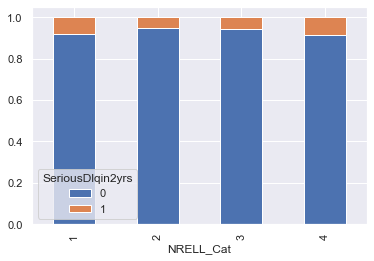

In [126]:
sb=pd.crosstab(df.NRELL_Cat,df.SeriousDlqin2yrs,normalize=0)
sb.plot.bar(stacked=True)

예상대로 그것은 가장 낮은 NumberRealEstateLoansOrLines의 범주에 더 많은 연체자가 있음을 보여줍니다.

In [127]:
df2=pd.crosstab(df.SeriousDlqin2yrs,df.NRELL_Cat)
chi2_contingency(df2)

(521.3188180426857,
 1.1438773309834148e-112,
 3,
 array([[52432.39408, 48839.72808, 29415.06952,  9286.80832],
        [ 3755.60592,  3498.27192,  2106.93048,   665.19168]]))

치 스퀘어 테스트는 NumberRealEstateLoansOrLines와 연체 사이에 상당한 의존성이 있음을 확립합니다.

SeriousDlqin2yrs vs NumberOfDependents

가장 간단한 방법은 NumberOf의 수단을 비교하는 것입니다., SeriousDlqin2yrs의 두 가지 범주로 종속성



In [128]:
df.groupby('SeriousDlqin2yrs')['NumberOfDependents'].agg(['count','mean'])

,count,mean
SeriousDlqin2yrs,,
0,139974,0.741159
1,10026,0.940555


<AxesSubplot:xlabel='SeriousDlqin2yrs'>

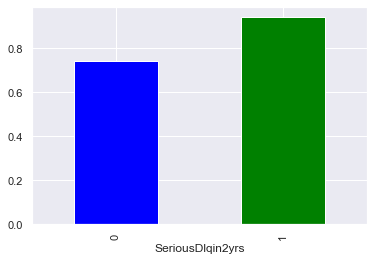

In [129]:
df['NumberOfDependents'].groupby(df.SeriousDlqin2yrs).mean().plot(kind='bar', color=['blue', 'green']) 

연체 된 고객에 비해 체납 된 cusomters는 더 높은 NumberOfDependents를 얻었습니다.

이제 NumberOf종속을 분류하여 관계를 자세히 살펴보겠습니다. 변수를 분류하기 위해 25, 50 및 75 백분위수를 컷오프로 선택합니다.


In [130]:
df['NumberOfDependents'].describe()

count    150000.000000
mean          0.754487
std           1.101377
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: NumberOfDependents, dtype: float64

In [131]:
def cat_ruul(ruul):
    if ruul <=0:
        return 1
    elif 0< ruul <=1:
        return 2
    elif 1< ruul <=2:
        return 3
    else:
        return 4

In [132]:
df['NOD_Cat']=df['NumberOfDependents'].apply(cat_ruul)
df.head(3)

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,ruul_cat,age_cat,DebtRatio_cat,MonthlyIncome_cat,NOCLL_Cat,NRELL_Cat,NOD_Cat
0,1,1,0.766127,45,0.802982,9120.0,13,5,2.0,4,2,4,4,4,4,3
1,2,0,0.957151,40,0.121876,2600.0,4,0,1.0,4,1,1,1,1,1,2
2,3,0,0.658180,38,0.085113,3042.0,2,0,0.0,4,1,1,1,1,1,1


In [133]:
df.groupby('NOD_Cat')['NumberOfDependents'].agg(['min','max'])

,min,max
NOD_Cat,,
1,0.0,0.0
2,1.0,1.0
3,2.0,2.0
4,3.0,5.0


In [134]:
pd.crosstab(df.SeriousDlqin2yrs, df.NOD_Cat, normalize='columns')

NOD_Cat,1,2,3,4
SeriousDlqin2yrs,,,,
0,0.941697,0.92732,0.919681,0.908779
1,0.058303,0.07268,0.080319,0.091221


<AxesSubplot:xlabel='NOD_Cat'>

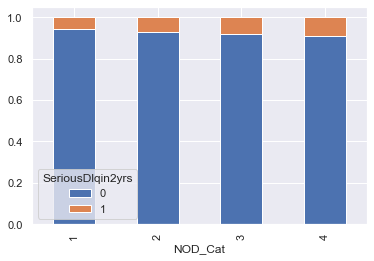

In [135]:
sb=pd.crosstab(df.NOD_Cat, df.SeriousDlqin2yrs, normalize=0)
sb.plot.bar(stacked=True)

In [136]:
df2=pd.crosstab(df.SeriousDlqin2yrs, df.NOD_Cat)
chi2_contingency(df2)

(307.8359012512757,
 2.0034894537531076e-66,
 3,
 array([[83260.26784, 25241.978  , 18705.1922 , 12766.56196],
        [ 5963.73216,  1808.022  ,  1339.8078 ,   914.43804]]))

치 스퀘어 테스트는 NumberOfDepends와 연체 사이에 상당한 의존성이 있음을 확립합니다.

이 토론은 EDA에 대한 개요를 제공했습니다. 이상적으로이것은 전문적인 프리젠 테이션을 초래해야합니다. 생성된 차트를 복사하여 프레젠테이션 소프트웨어에 붙여넣을 수 있거나 요약된 값을 사용하여 차트를 만들 수 있습니다. 이 각 분석은 결론으로 지원되어야 합니다.